## Example - Culvert Model

This example is taken from "Design Guideline 4" that appears in the
Federal Highway Administration's Hydraulic Design of Highway Culverts,
Third Edition (HDS-5, April 2012, page DG4.2, http://www.fhwa.dot.gov/
engineering/hydraulics/pubs/12026/hif12026.pdf). It models a culvert
designed to convey a 25-year design flow without overtopping the road
passing over it. There is significant storage in the channel upstream
of the culvert whose effect in reducing peak flow is accounted for.

The physical components of the model include:
1) A storage node named "Inlet" that recieves a design flow hydrograph
   as inflow and represents the upstream channel storage with an area
   versus depth curve.
2) A two barrel culvert that connects the "Inlet" node to an "Outlet"
   node that runs underneath a road. Each barrel is a 36" inch circular
   corrugated metal pipe.
3) A ROADWAY type weir that represents the road crossing and is offset
   from the "Inlet" invert the height of the road's shoulder.
4) A downstream natural channel that conveys flow from the culvert 
   "Outlet" to an outfall node named "Tailwater" that is assigned a
   fixed stage.

The data components consist of the inflow hydrograph time series which
has a 3-hour duration and peak flow of 220 cfs, and a V-shaped storage
curve that provides about 3 acres of surface area at a depth of 8 feet.

Some specific features to note about the model are:
1) The "Culvert" pipe has its Culvert Code property set to 4, which is
   the code for a circular corrugated metal pipe with headwall inlet.
2) The "Roadway" weir has its Road Width property set to 40 ft and its
   Road Surface property set to GRAVEL.
3) The downstream channel is trapezoidal with a bottom width of 10 ft
   and side slopes of 2:1.
4) Dynamic Wave flow routing is used (culvert analysis requires that
   this option be selected) with a 5 second variable time step.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import swmm_api
print(f'{swmm_api.__version__ = }')

swmm_api.__version__ = '0.4.59'


In [3]:
from swmm_api import SwmmInput, SwmmOutput, SwmmReport
from swmm_api.input_file.macros import storage_to_junction
from swmm_api.input_file.macros.plotting_map import (init_empty_map_plot, add_node_map, add_link_map, add_node_labels, add_link_labels)
from swmm_api.output_file import OBJECTS, VARIABLES
from swmm_api.run_swmm import swmm5_run_progress
from swmm_api.run_swmm.run_temporary import swmm5_run_temporary

In [5]:
inp = SwmmInput('Culvert_Model.inp')

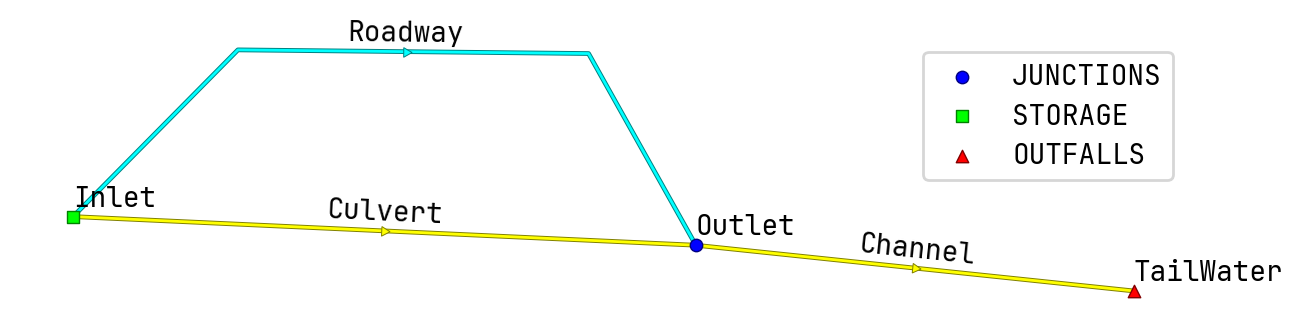

In [6]:
fig, ax = init_empty_map_plot()
ax.set_axis_off()
ax.set_aspect('equal')
add_link_map(ax, inp, add_arrows=True)
add_node_map(ax, inp)
add_node_labels(ax, inp, ha='left', y_offset=45)
add_link_labels(ax, inp, y_offset=45)

Run the example and plot both the total inflow to the "Inlet" node
and the flow in the "Channel" conduit on the same graph. Note how
the peak flow has been reduced from 220 cfs to 150 cfs. If you compare
this curve with the curve shown in FHWA HDS-5 (on page DG4.10) you
will see that the two are virtually identical. Also note that there is
no overtopping of the roadway since there is no flow through the Roadway
weir. 

In [7]:
with swmm5_run_temporary(inp.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmp8p5902mz/example_run_swmm.inp:   0%|          | 0/10…

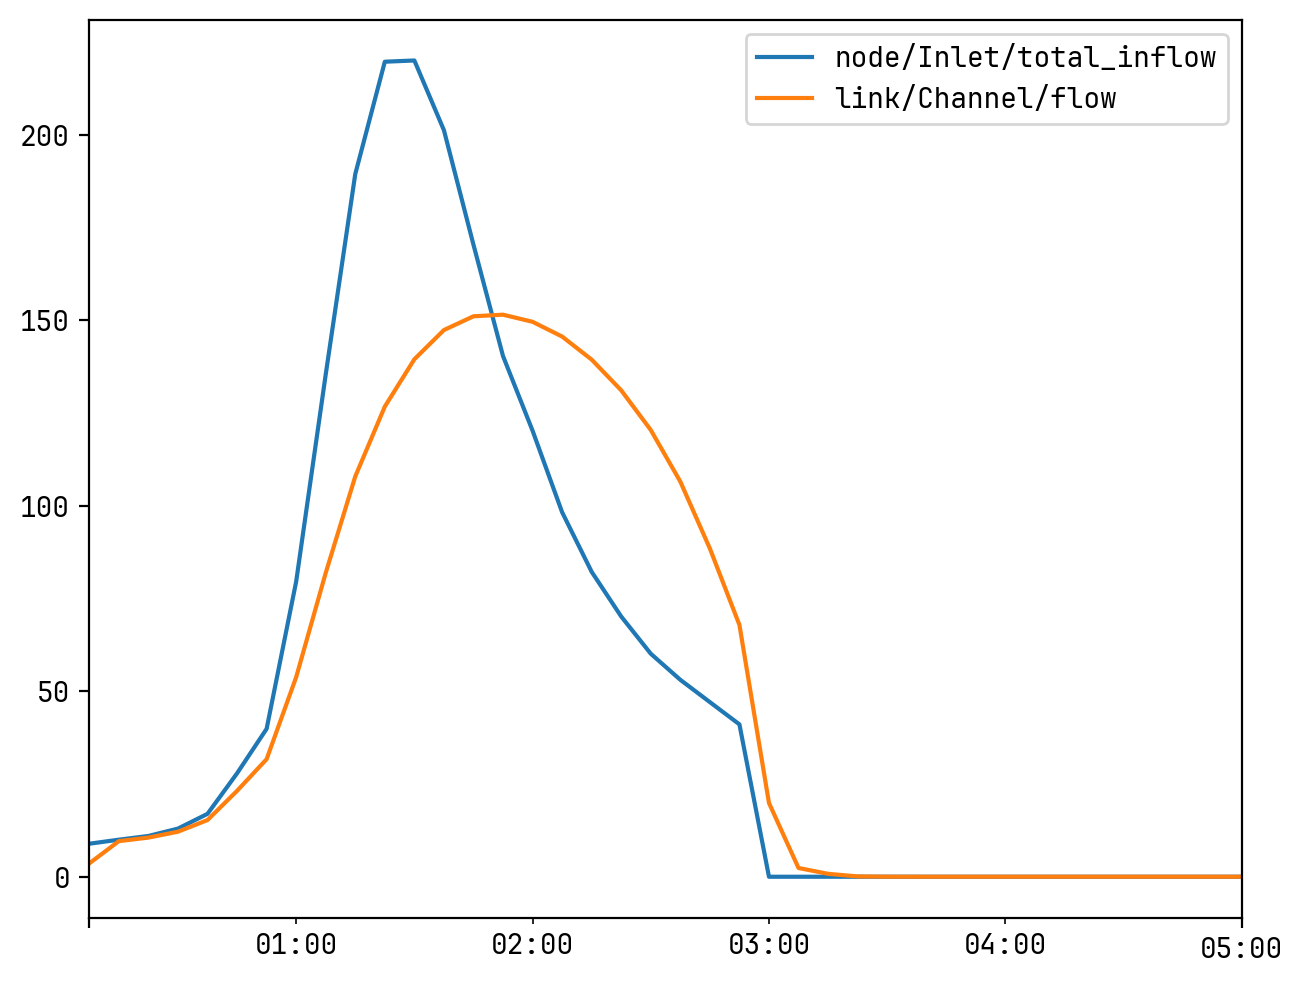

In [8]:
ax = out.get_part(OBJECTS.NODE, 'Inlet', VARIABLES.NODE.TOTAL_INFLOW).plot()
ax = out.get_part(OBJECTS.LINK, 'Channel', VARIABLES.LINK.FLOW).plot(ax=ax)
ax.legend()

Then try re-running the example with the Inlet storage node converted
to a Junction node (right-click on the node and select Convert To
Junction). This removes the effect of upstream storage. If you plot
the Culvert and Roadway weir flow on the same graph you will see that
the roadway gets flooded when the peak flow occurs.

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmp7ane9wc0/example_run_swmm.inp:   0%|          | 0/10…

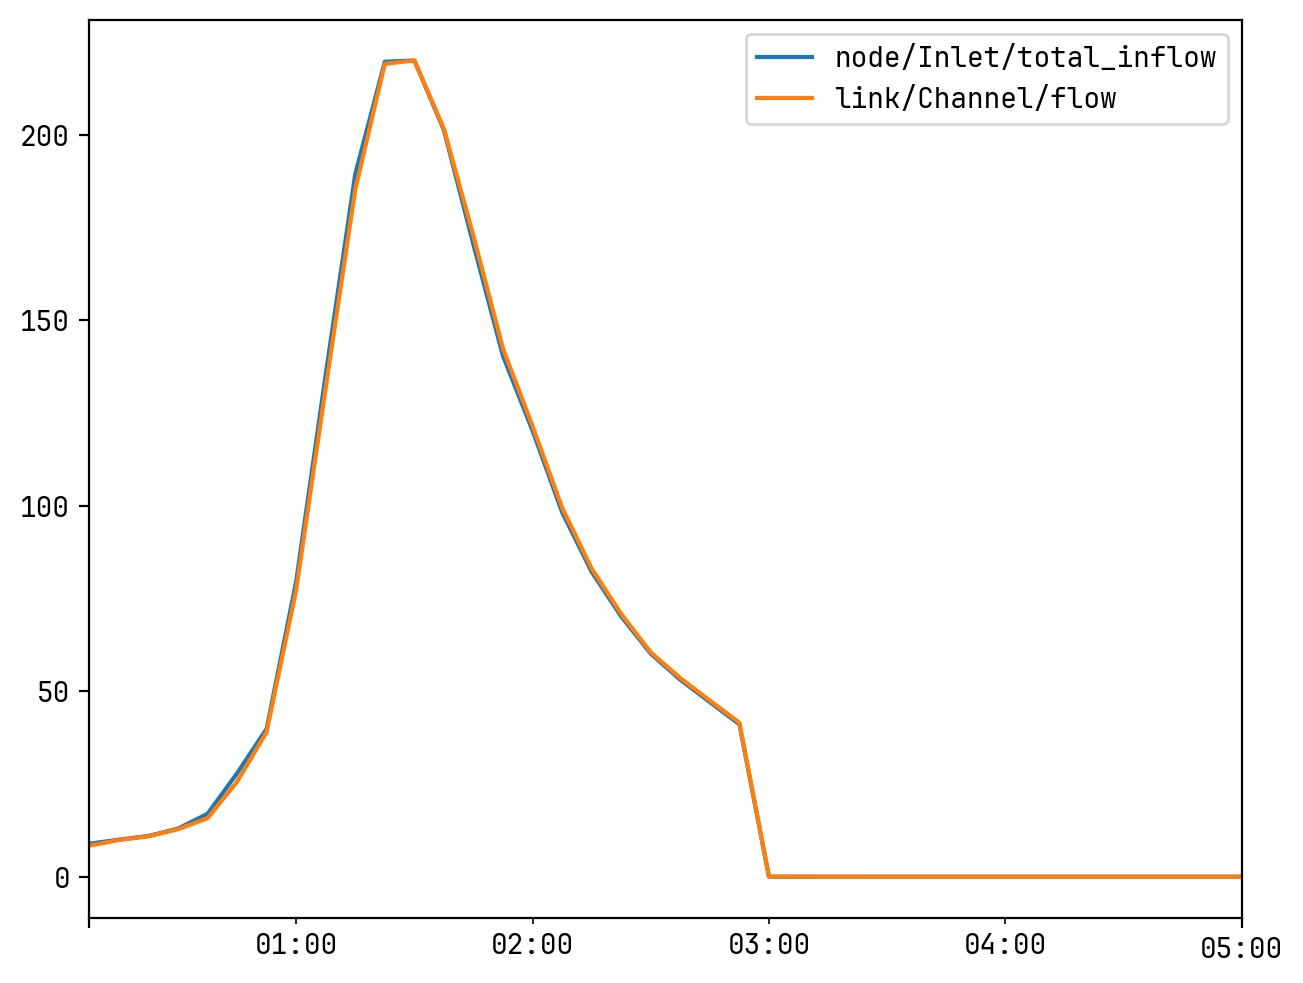

In [9]:
inp_ = inp.copy()
storage_to_junction(inp_, 'Inlet')
with swmm5_run_temporary(inp_.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    out_ = res.out  # type: SwmmOutput
    rpt_ = res.rpt  # type: SwmmReport

ax = out_.get_part(OBJECTS.NODE, 'Inlet', VARIABLES.NODE.TOTAL_INFLOW).plot()
ax = out_.get_part(OBJECTS.LINK, 'Channel', VARIABLES.LINK.FLOW).plot(ax=ax)
ax.legend()

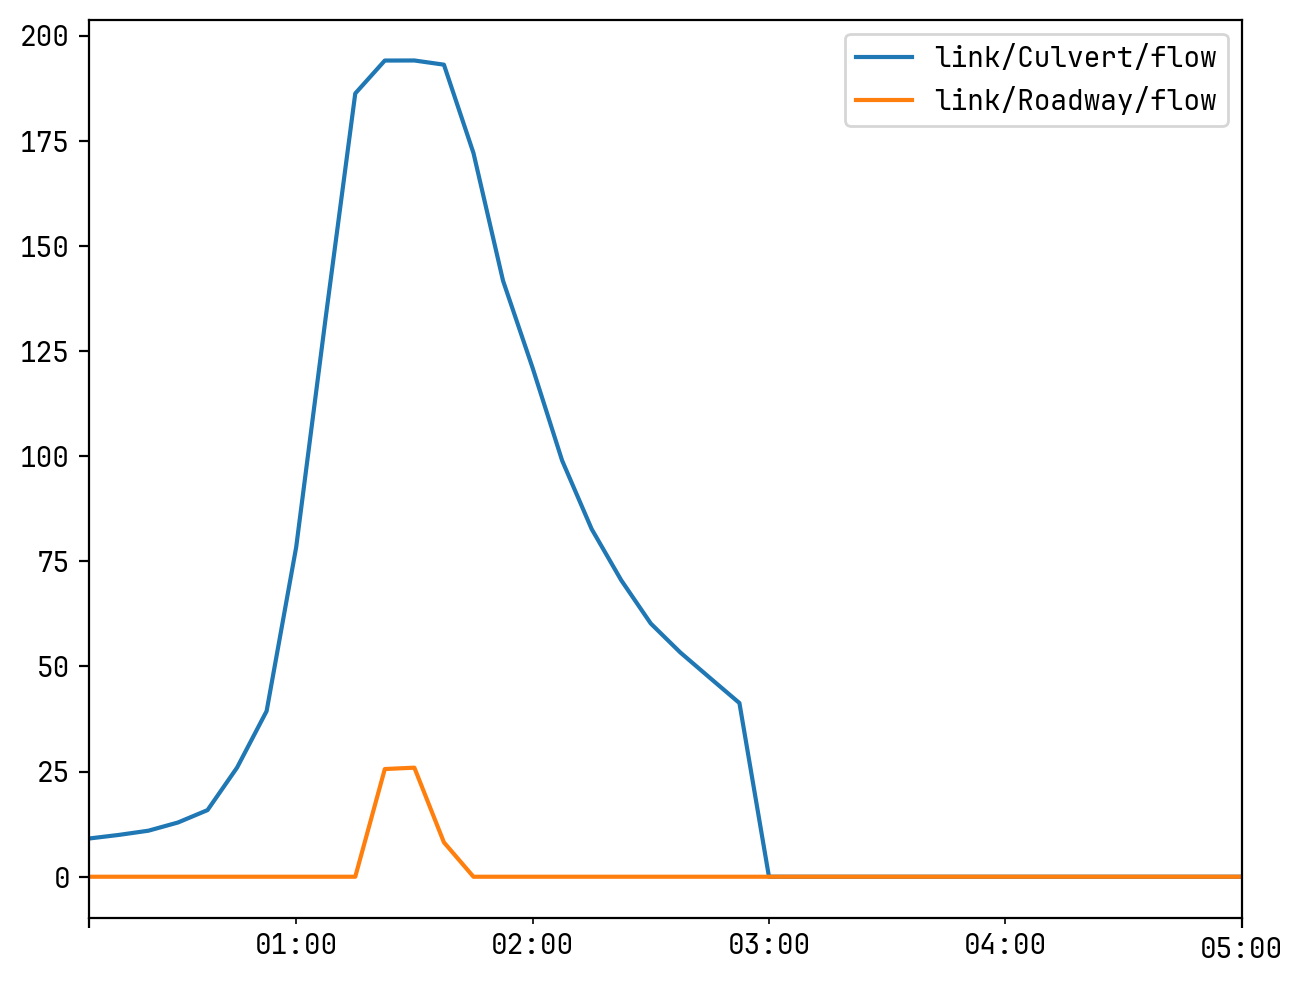

In [10]:
ax = out_.get_part(OBJECTS.LINK, 'Culvert', VARIABLES.LINK.FLOW).plot()
ax = out_.get_part(OBJECTS.LINK, 'Roadway', VARIABLES.LINK.FLOW).plot(ax=ax)
ax.legend()